In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 18.4MB/s 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno
from collections import defaultdict

import csv
import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cr= pd.read_csv('/content/drive/My Drive/Fifa 19/club_rank.csv', index_col = False)
df = pd.read_csv('/content/drive/My Drive/Fifa 19/clean-data-2.csv', index_col = False)

In [ ]:
nation_rt = pd.read_csv('/content/drive/My Drive/Fifa 19/nation_rating.csv', index_col = False)
nation_rt = nation_rt.loc[nation_rt['rank_date'] == '2020-11-26']
nt = nation_rt[['country_full','total_points' ]].copy()
nt = nt.sort_values(by=['total_points'], ascending = False)
nt = nt.rename(columns={"country_full": "Nationality"})

In [ ]:
un_n = (set(df['Nationality']))
mn= set(nt['Nationality'])
common = (mn).intersection(un_n)
print (len(common))
print(common)
und= un_n.difference(mn)
print(len(und), sorted(und))

164
{'Senegal', 'Poland', 'Israel', 'Austria', 'Togo', 'Malta', 'Barbados', 'South Sudan', 'Ethiopia', 'Jamaica', 'Korea DPR', 'Belize', 'Cameroon', 'Gambia', 'Bolivia', 'Namibia', 'Republic of Ireland', 'Iceland', 'Greece', 'Mauritania', 'Germany', 'El Salvador', 'Norway', 'Luxembourg', 'Iraq', 'Slovenia', 'Turkey', 'Guinea Bissau', 'Niger', 'St Kitts Nevis', 'Nicaragua', 'Bosnia Herzegovina', 'Gabon', 'Canada', 'Cyprus', 'Estonia', 'Egypt', 'Scotland', 'Mozambique', 'Benin', 'Eritrea', 'Denmark', 'Burundi', 'France', 'Thailand', 'Slovakia', 'Saudi Arabia', 'Ecuador', 'Burkina Faso', 'Kosovo', 'Mali', 'Liechtenstein', 'Bermuda', 'Czech Republic', 'Armenia', 'Indonesia', 'Rwanda', 'Morocco', 'Uzbekistan', 'Latvia', 'Peru', 'Kuwait', 'Libya', 'China PR', 'Sweden', 'Mexico', 'Lebanon', 'Wales', 'Hungary', 'Kazakhstan', 'Belarus', 'Georgia', 'Kenya', 'United States', 'Ivory Coast', 'Trinidad & Tobago', 'Fiji', 'Qatar', 'Chile', 'Spain', 'Switzerland', 'Grenada', 'Montserrat', 'Oman', 'New

In [ ]:
nt["Nationality"].replace({"Antigua and Barbuda": "Antigua & Barbuda" , "Bosnia and Herzegovina" : "Bosnia Herzegovina","Cabo Verde":"Cape Verde","Central African Republic":"Central African Rep.","Curaçao":"Curacao","Congo DR":"DR Congo","North Macedonia":"FYR Macedonia","Guinea-Bissau":"Guinea Bissau","IR Iran":"Iran","Côte d'Ivoire":"Ivory Coast","St. Kitts and Nevis":"St Kitts Nevis", "St. Lucia": "St Lucia", "São Tomé and Príncipe":"São Tomé & Príncipe","Trinidad and Tobago":"Trinidad & Tobago", "USA": "United States"}, inplace=True)

In [ ]:
nt = nt.rename(columns={"total_points": "nation_rating"})

In [ ]:
nt.to_csv('/content/drive/My Drive/Fifa 19/nation.csv', index = False)

In [ ]:
nt = pd.read_csv('/content/drive/My Drive/Fifa 19/nation.csv', index_col = False)

In [ ]:
nt

In [ ]:
avg_club = df.groupby('Club').Overall.mean().reset_index().sort_values(by='Overall', ascending=False)
avg_club = avg_club.rename(columns={"Overall": "Club_overall"})
(avg_club)



,Club,Club_overall
327,Juventus,82.280000
399,Napoli,80.000000
316,Inter,79.750000
471,Real Madrid,78.242424
383,Milan,78.074074
...,...,...
544,Sligo Rovers,56.631579
188,Derry City,55.777778
83,Bohemian FC,55.000000
362,Limerick FC,54.526316


In [ ]:
fdf = (pd.merge(df, avg_club, on='Club'))


In [ ]:
fdf = (pd.merge(fdf, nt, on='Nationality'))

In [ ]:
for index in fdf.index:
  if fdf.at[index, 'Club']=='Free Agent':
    fdf.at[index,'Club_overall'] = 0

fdf

In [ ]:
sorted(set(fdf['Loaned From']))

In [ ]:
for index in fdf.index:
  if fdf.at[index, 'Loaned From']=='None':
    fdf.at[index,'Loaned From'] = 0
  else:
    fdf.at[index,'Loaned From'] = 1


In [ ]:
fdf[fdf['Loaned From']==0]

In [ ]:
fdf['Loaned From']= fdf['Loaned From'].astype(int)  

In [ ]:
#fdf.drop(['Nationality', 'Club'], axis= 1,  inplace= True)

In [ ]:
cat_cols = ['Preferred Foot', 'Loaned From']

In [ ]:
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
tdf = fdf.copy()
tdf['Release Clause'].apply(float.is_integer).all()

False

Make data column type int if the column has only integer values

In [ ]:
for col in tdf.select_dtypes(include='float').keys().tolist():
  print (col, ': ', len(set(tdf[col])))
  if tdf[col].apply(float.is_integer).all() == True:
    tdf[col] = tdf[col].astype(int)

In [ ]:
# run the same code for 'Attack Work Rate' also
for index in tdf.index:
  if tdf.at[index, 'Defense Work Rate']!= -1:
    #print (index)
    tdf.at[index,'Defense Work Rate'] = tdf.at[index,'Defense Work Rate']  +1


In [ ]:
for index in tdf.index:
  if tdf.at[index, 'Attack Work Rate']!= -1:
    #print (index)
    tdf.at[index,'Attack Work Rate'] = tdf.at[index,'Attack Work Rate']  +1


In [ ]:
tdf.to_csv('/content/drive/My Drive/Fifa 19/common_data.csv', index = False)

In [ ]:
tdf = pd.read_csv('/content/drive/My Drive/Fifa 19/common_data.csv', index_col = False)

In [ ]:
!pip install git+https://github.com/MaxHalford/xam --upgrade
import xam

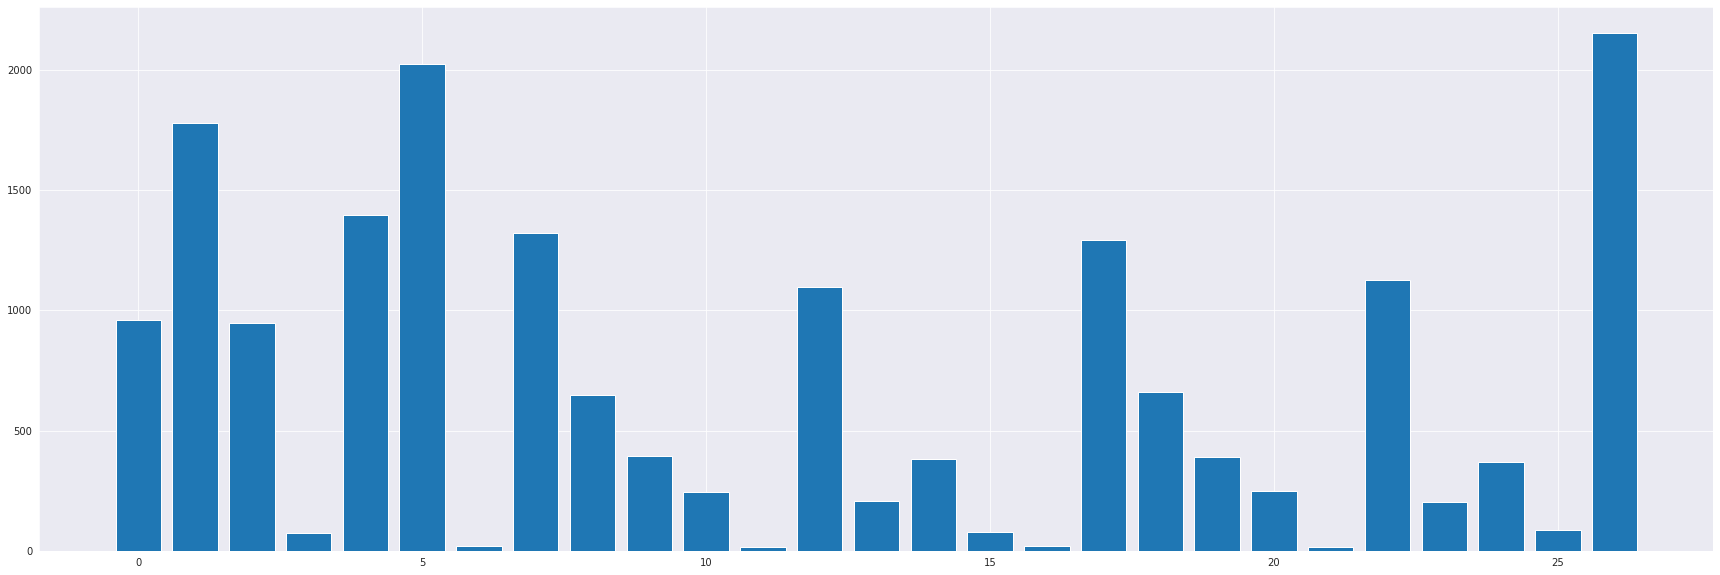

In [ ]:
jd = tdf['Position'].value_counts(ascending=True).to_dict()
plt.rcParams['figure.figsize'] = [30, 10]
plt.bar(*zip(*jd.items()))
plt.show()

In [ ]:
encoder = xam.feature_extraction.BayesianTargetEncoder(columns=['Position'],  prior_weight=200,suffix='')
encoder.fit_transform(fdf, fdf['Value'])
fdf['Position']

0       3169170.4641
1       3445794.5128
2       2688195.4836
3       1660593.6271
4       1669734.9951
            ...     
18142   1669734.9951
18143   3669289.4846
18144   3669289.4846
18145   1669734.9951
18146   2870614.1748
Name: Position, Length: 18147, dtype: float64

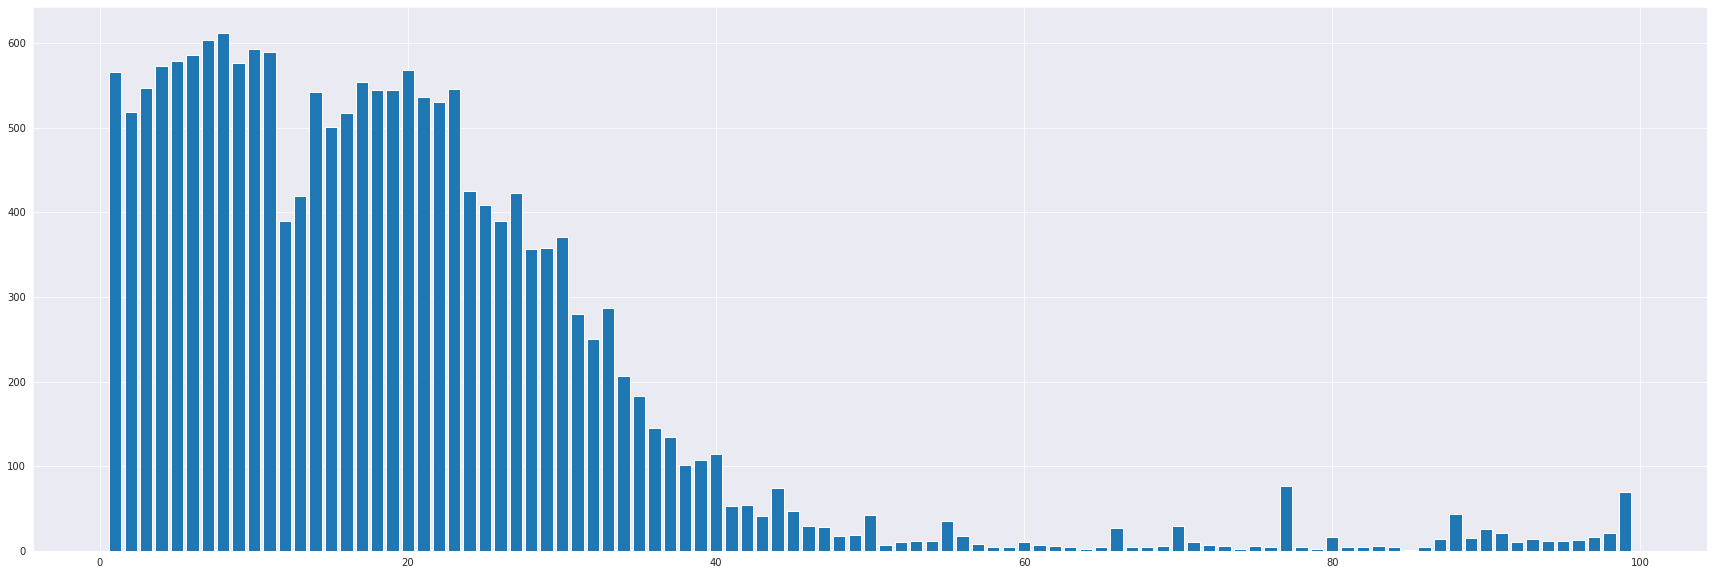

In [ ]:
jd = tdf['Jersey Number'].value_counts(ascending=True).to_dict()
plt.bar(*zip(*jd.items()))
plt.show()

In [ ]:
encoder = xam.feature_extraction.BayesianTargetEncoder(columns=['Jersey Number'],  prior_weight=150,suffix='')
encoder.fit_transform(tdf, tdf['Value'])
#tdf['Joined']

In [ ]:
cols = ['Contract Valid Until', 'Joined']
for col in cols:
  mn = sorted(set (tdf[col]))[1]
  for index in tdf.index:
    
    if tdf.at[index, col]!= -1:
      #print (index)
      tdf.at[index,col] = tdf.at[index,col]  - mn + 1
    else:
      tdf.at[index,col] = 0

In [ ]:
tdf

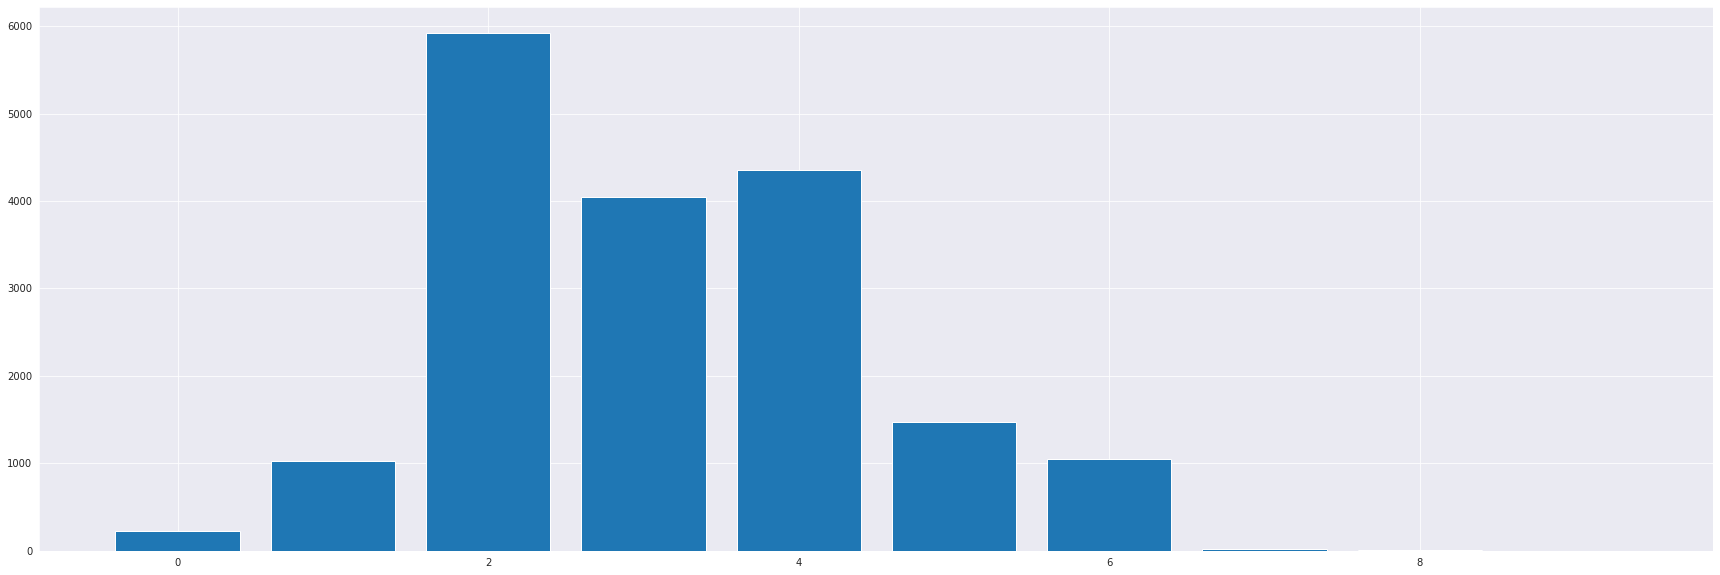

In [ ]:
jd = tdf['Contract Valid Until'].value_counts(ascending=True).to_dict()
plt.bar(*zip(*jd.items()))
plt.show()

In [ ]:
encoder = xam.feature_extraction.BayesianTargetEncoder(columns=['Contract Valid Until'],  prior_weight=200,suffix='')
encoder.fit_transform(fdf, fdf['Value'])
fdf['Contract Valid Until']

0       2564187.6799
1       5112660.0001
2       2564187.6799
3       2564187.6799
4       2564187.6799
            ...     
18142   1533517.2909
18143   1533517.2909
18144   1533517.2909
18145   2148925.7352
18146   2148925.7352
Name: Contract Valid Until, Length: 18147, dtype: float64

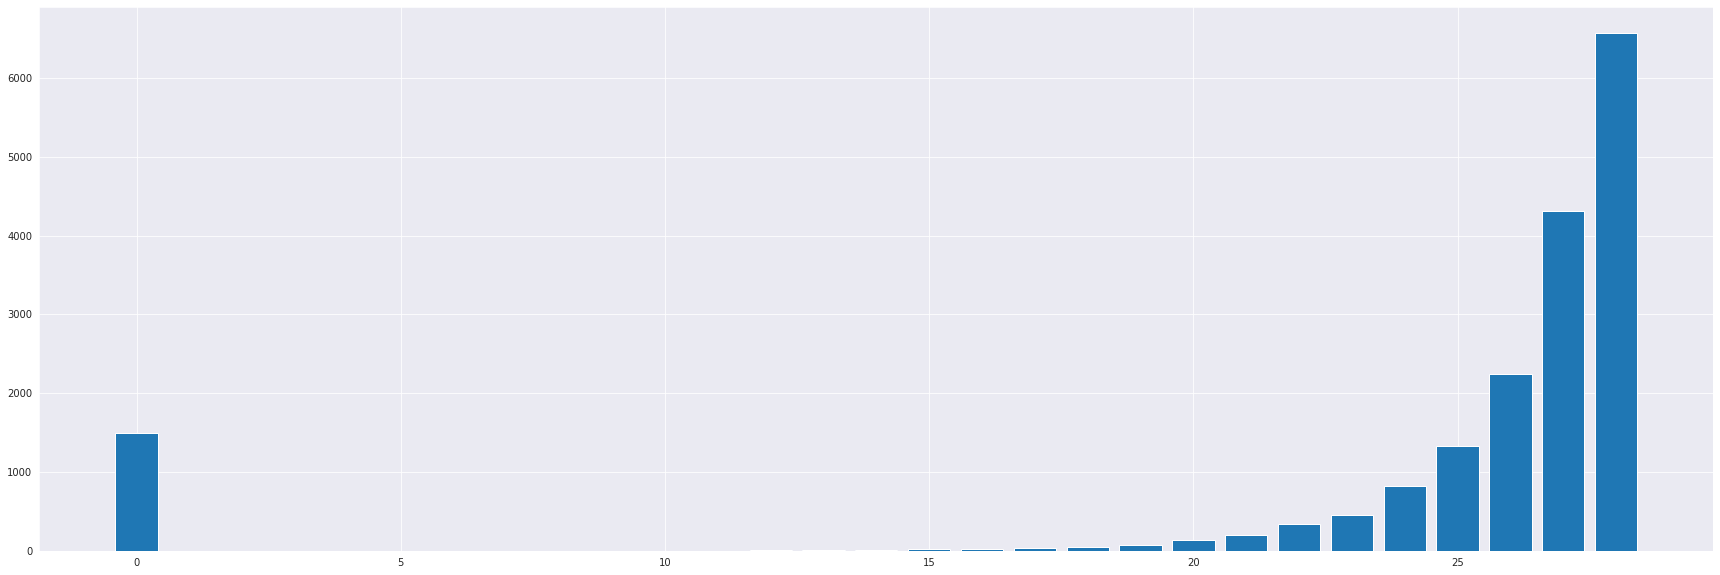

In [ ]:
jd = tdf['Joined'].value_counts(ascending=True).to_dict()
plt.bar(*zip(*jd.items()))
plt.show()

In [ ]:
encoder = xam.feature_extraction.BayesianTargetEncoder(columns=['Joined'],  prior_weight=1000,suffix='')
encoder.fit_transform(fdf, fdf['Value'])
fdf['Joined']

0       2512568.2818
1       2942765.0262
2       2942765.0262
3       2942765.0262
4       2926773.4330
            ...     
18142   2942765.0262
18143   1979584.3706
18144   2179681.3833
18145   1979584.3706
18146   2179681.3833
Name: Joined, Length: 18147, dtype: float64

In [ ]:
tdf = tdf.sample(frac=1).reset_index(drop=True)


In [ ]:
tdf

In [ ]:
tdf.to_csv('/content/drive/My Drive/Fifa 19/final_data_rec.csv', index = False)

In [ ]:
tdf.drop(['Nationality', 'Club'], axis= 1,  inplace= True)